In [23]:
from thx.hadoop import hdfs_cache as hdfs
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
APPLICATION_ID="application_1597801784015_418506"
PATH_TO_LOG=f"/user/vm.guerramoran/flights_output/{APPLICATION_ID}_log"
PATH_TO_METRICS=f"{PATH_TO_LOG}/metrics/part-00000"
PATH_TO_MODEL=f"{PATH_TO_LOG}/model/part-00000"
PATH_TO_FEATURES=f"{PATH_TO_LOG}/features/part-00000"

Num Trees: 523
trainLogLoss 0.113408
validationLogLoss 0.320654


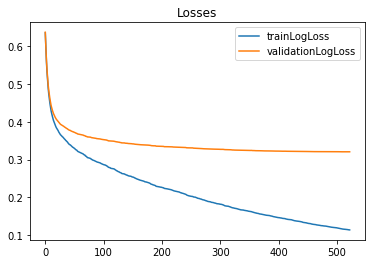

In [25]:
with hdfs.open(PATH_TO_METRICS, mode='rb') as metrics:
    df = pd.read_csv(metrics, sep='\t')
    df = df[df['trainLogLoss'] > 0.0]
    print(f"Num Trees: {df.shape[0]}")
    ax = df.plot()
    print(df.columns[0], df.values[-1][0])
    print(df.columns[1], df.values[-1][1])
    ax.title.set_text('Losses')

In [26]:
featureNamesDf = None
with hdfs.open(PATH_TO_FEATURES, mode='rb') as features:
    featureNamesDf = pd.read_csv(features)
    namesMap = {}
    for i, info in featureNamesDf.iterrows():
        namesMap[f"f{i}"] = info['featureName']

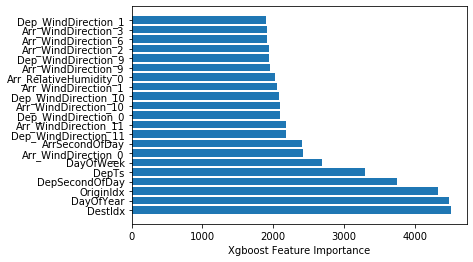

In [27]:
fscores = None
with hdfs.open(PATH_TO_MODEL, mode='rb') as model_scores:
    fscores = pd.read_csv(model_scores, sep='\t')
    fids = fscores.iloc[:,0].values    
    fnames = np.array([namesMap[x] for x in fids])
    scores = fscores.iloc[:, 1].values
    sortedIdx = list(reversed(list(scores.argsort())))[0:21]
    plt.barh(fnames[sortedIdx], scores[sortedIdx])
    plt.xlabel("Xgboost Feature Importance")